In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import root
import pychebfun
from scipy.signal import find_peaks


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [15]:
I_1_arr = np.linspace(0, 200, 2000) # let's work in mW
# start with a highly reflective cavity
R = 0.9
T = 1-R
r = np.sqrt(R)
t = np.sqrt(T)
alpha_0 = 600 #cm-1
I_s = 2 # mW/cm^2
alpha = alpha_0 / (1 + I_1_arr/I_s)
l = 2e-3 #cm

C_0 = R*alpha_0*l/(1-R)


def solve_I_2(I_1, C_0):
    def equation(I_2):
        return T * I_2 * (1 + C_0 / (1 + (2 * I_2 / I_s)))**2 - I_1
    
    lower_bound = 1e-6
    upper_bound = 500
    
    try:
        I_2_solution = sp.optimize.brentq(equation, lower_bound, upper_bound)
        return I_2_solution
    except ValueError:
        return np.nan

In [16]:
I_1_arr = np.linspace(0, 200, 2000) # let's work in mW
# start with a highly reflective cavity
R = 0.9
T = 1-R
r = np.sqrt(R)
t = np.sqrt(T)
alpha_0 = 600 #cm-1
I_s = 2 # mW/cm^2
alpha = alpha_0 / (1 + I_1_arr/I_s)
l = 2e-3 #cm

C_0 = R*alpha_0*l/(1-R)

In [17]:
I_2_solutions = np.array([solve_I_2(I_1, 30) for I_1 in I_1_arr])

Text(0, 0.5, '$I_3 (mW/cm^2)$')

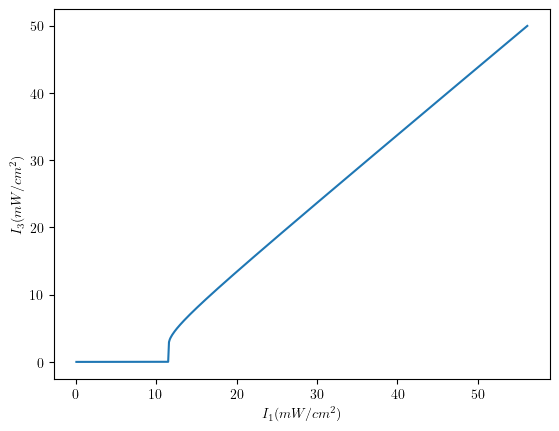

In [18]:
plt.plot(I_1_arr, T*I_2_solutions)
plt.xlabel("$I_1 (mW/cm^2)$")
plt.ylabel("$I_3 (mW/cm^2)$")

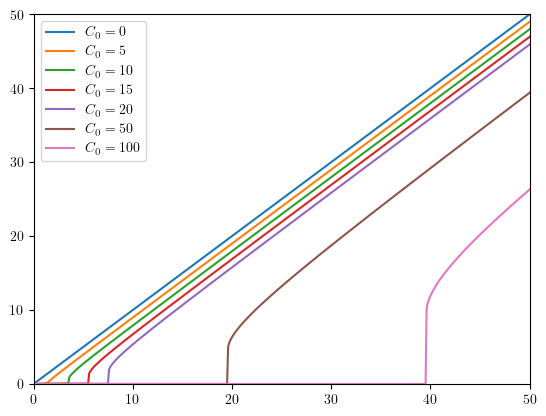

<Figure size 640x480 with 0 Axes>

In [21]:
C_0_arr = [0, 5, 10, 15, 20, 50, 100]
for C_0 in C_0_arr:
    I_2_solutions = np.array([solve_I_2(I_1, C_0) for I_1 in I_1_arr])
    plt.plot(I_1_arr, T*I_2_solutions, label=f"$C_0 = {C_0}$")
plt.legend()
plt.xlim(0,50)
plt.ylim(0,50)
plt.show()
plt.savefig("dispersive_bistability.png")

Text(0, 0.5, '$T$ (a.u.)')

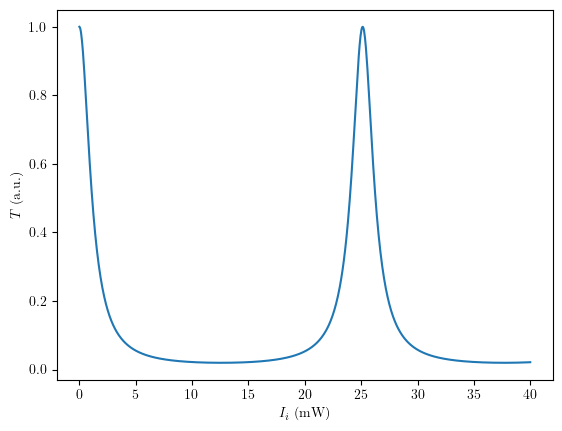

In [7]:
F = 50
gamma = 0.1
I_i = np.linspace(0,40,1000)
delta = np.linspace(0, 1,1000)
T = 1 / (1 + F * np.sin(delta + gamma * I_i)**2)
plt.plot(I_i, T)
plt.xlabel("$I_i$ (mW)")
plt.ylabel("$T$ (a.u.)")

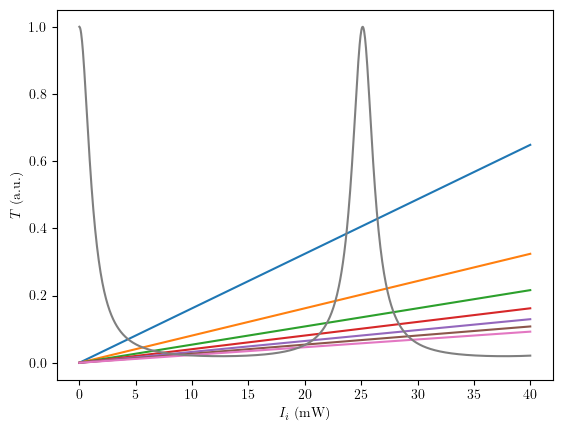

<Figure size 640x480 with 0 Axes>

In [13]:
I_0_arr = np.arange(5, 40, 5)
R = 0.85
T2_vals = []

for I_0 in I_0_arr:
    T2 = (1-R)/(1+R) * (I_i / I_0)
    T2_vals.append(T2)
    plt.plot(I_i, T2)
    
T = 1 / (1 + F * np.sin(delta + gamma * I_i)**2)
plt.plot(I_i, T)
plt.xlabel("$I_i$ (mW)")
plt.ylabel("$T$ (a.u.)")
plt.show()

plt.savefig("absorptive_bistability.png")